In [75]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from debugpy.common.timestamp import current

from Data_prep import charging_data

In [76]:
charging_data = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data = pd.read_pickle(os.path.join('Data', 'weather_data.pkl'))

In [77]:
charging_data.head(20)

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,connection_date,charging_duration,connection_duration
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",2020-01-02,262.683333,362.350000
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",2020-01-02,401.250000,541.516667
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",2020-01-02,158.516667,642.783333
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",2020-01-02,78.783333,158.683333
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",2020-01-02,257.483333,488.650000
5,5,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13-08:00,2020-01-02 15:00:41-08:00,2020-01-02 12:13:21-08:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,3519,"[{'WhPerMile': 600, 'kWhRequested': 24.0, 'mil...",2020-01-02,373.133333,540.466667
6,6,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,933,"[{'WhPerMile': 385, 'kWhRequested': 65.45, 'mi...",2020-01-02,650.116667,708.733333
7,7,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,3737,"[{'WhPerMile': 300, 'kWhRequested': 45.0, 'mil...",2020-01-02,365.133333,627.366667
8,8,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38-08:00,2020-01-02 11:36:05-08:00,2020-01-02 10:38:39-08:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,419,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil...",2020-01-02,253.016667,310.450000
9,9,5e23b149f9af8b5fe4b973d8,2020-01-02 06:27:40-08:00,2020-01-02 12:01:48-08:00,2020-01-02 11:17:46-08:00,13.285,1_1_178_823_2020-01-02 14:27:39.582337,1,AG-1F08,1-1-178-823,America/Los_Angeles,651,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil...",2020-01-02,290.100000,334.133333


### Task 2: Descriptive Analytics
#### a): number of charging events varies during day, week and between season. What patterns can you observe and how do you explain them?

<function matplotlib.pyplot.show(close=None, block=None)>

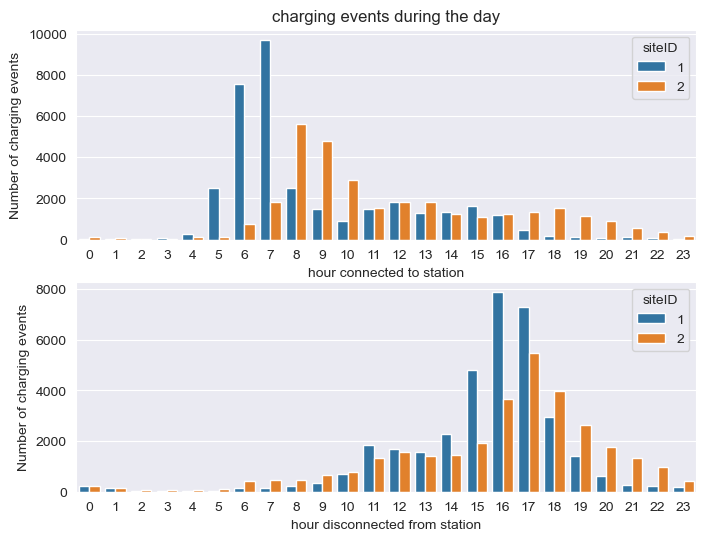

In [78]:
#charging events during day

connectionTime_hour = charging_data['connectionTime'].dt.hour
connectionTime_day = charging_data['connectionTime'].dt.day
disconnectionTime_hour = charging_data['disconnectTime'].dt.hour
discconnectionTime_day = charging_data['disconnectTime'].dt.day

plt.figure(figsize= (8,6))
plt.subplot(2,1,1)
sns.countplot(data=charging_data, x = connectionTime_hour, hue='siteID')
plt.xlabel('hour connected to station')
plt.ylabel('Number of charging events')
plt.title('charging events during the day')

plt.subplot(2,1,2)
sns.countplot(data=charging_data, x = disconnectionTime_hour, hue="siteID")
plt.xlabel('hour disconnected from station')
plt.ylabel('Number of charging events')


plt.show




#### Charging Events per week

Text(0.5, 1.0, 'charging events during the week')

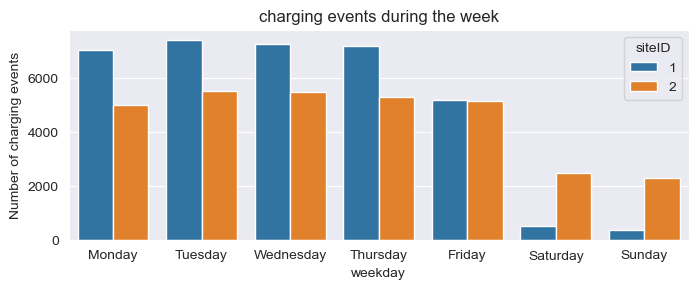

In [79]:
charging_data['weekday'] =  charging_data['connectionTime'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize= (8,6))
plt.subplot(2,1,1)
sns.countplot(data=charging_data, x = 'weekday', order = weekday_order, hue="siteID")
plt.xlabel('weekday')
plt.ylabel('Number of charging events')
plt.title('charging events during the week')



the Diagram shows that during the weekday siteID one was used more often for charging events whereas siteID two was used on the weekend more often

#### Charging events per season 

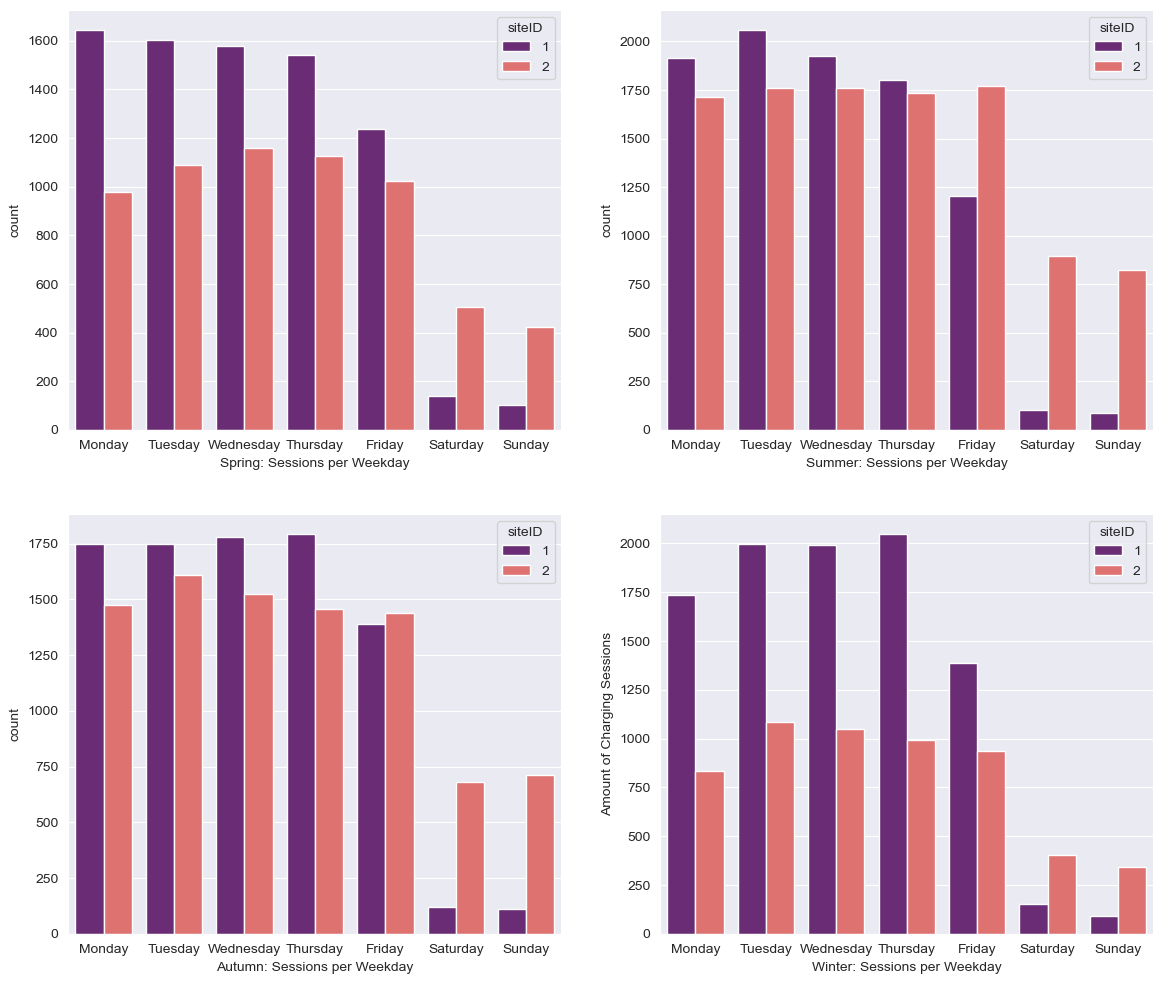

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
charging_data_summer = charging_data[
    charging_data['connectionTime'].dt.month.isin([6,7,8])].copy()

charging_data_autumn = charging_data[
    charging_data['connectionTime'].dt.month.isin([9,10,11])].copy()

charging_data_winter = charging_data[
    charging_data['connectionTime'].dt.month.isin([12,1,2])].copy()

charging_data_spring = charging_data[
    charging_data['connectionTime'].dt.month.isin([3,4,5])].copy()

sns.countplot(x="weekday", data=charging_data_spring, hue="siteID", palette="magma", order = weekday_order, ax=axes[0,0])
sns.countplot(x="weekday", data=charging_data_summer, hue="siteID", palette="magma", order = weekday_order, ax=axes[0,1])

sns.countplot(x="weekday", data=charging_data_autumn, hue="siteID", palette="magma", order = weekday_order, ax=axes[1,0])
sns.countplot(x="weekday", data=charging_data_winter, hue="siteID", palette="magma", order = weekday_order, ax=axes[1,1])
axes[0,0].set_xlabel("Spring: Sessions per Weekday")
axes[1,1].set_ylabel("Amount of Charging Sessions")

axes[0,1].set_xlabel("Summer: Sessions per Weekday")
axes[1,1].set_ylabel("Amount of Charging Sessions")

axes[1,0].set_xlabel("Autumn: Sessions per Weekday")
axes[1,1].set_ylabel("Amount of Charging Sessions")

axes[1,1].set_xlabel("Winter: Sessions per Weekday")
axes[1,1].set_ylabel("Amount of Charging Sessions")
plt.show()




#### 2b: Key Performance Indicators
Duration per Session 
KWhDelivered 


#### business interesting KPIs

**Performance of kWhDelivered**: (Amount of kWhDelivered / total Charging Duration)  per Station (SiteID) 

**Fluctuation**: (Number of Charging Events / total Charging Duration) per Station (SiteID?) 

**Utilization**: total Charging Duration / max Charging Duration possible per Station (SiteID) 

total Charging Duration per Day: discconectTime - connectTime


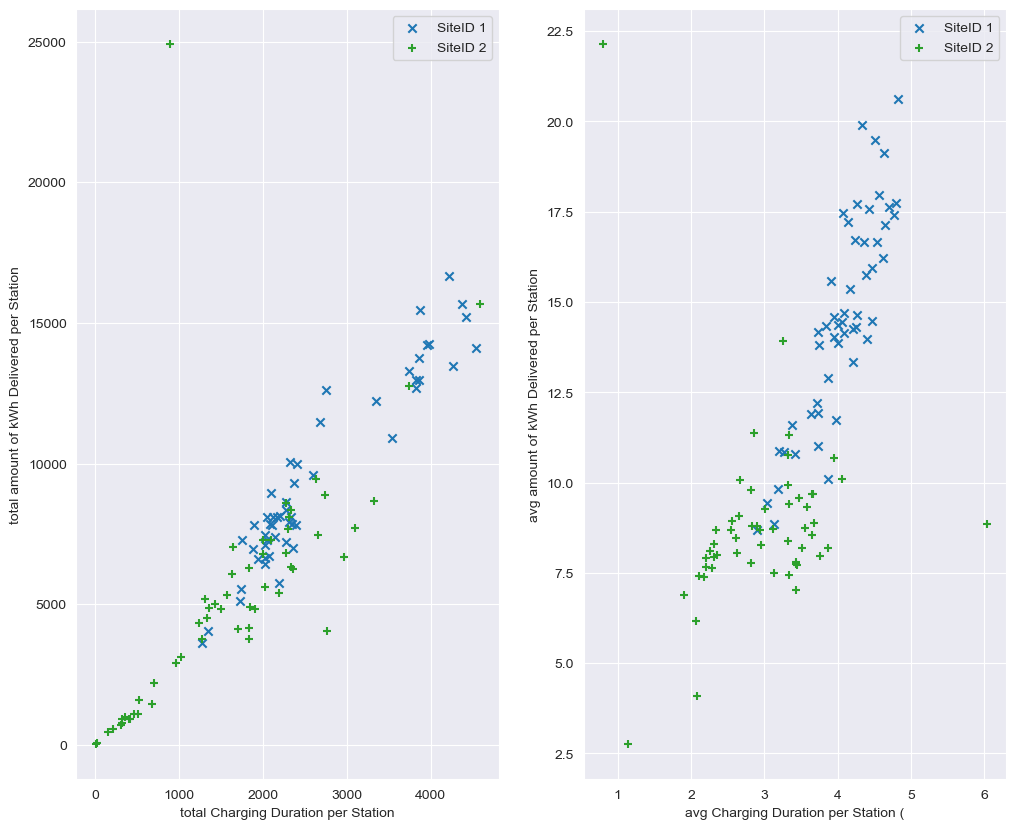

In [82]:

charging_data['hour'] = charging_data['connectionTime'].dt.hour

station_duration_kpi = charging_data.groupby('stationID').agg({
    'chargingDuration': ['mean', 'sum', 'count'], 
    'kWhDelivered': ['mean', 'sum']}).reset_index()
station_duration_kpi.columns = ['stationID', 'avgChargingDuration', 'totalChargingDuration', 'numChargingEvents', 'avgkWhDelivered', 'totalkWhDelivered']

station_duration_stats = station_duration_kpi.merge(
    charging_data[['stationID', 'siteID']].drop_duplicates(),
    on='stationID',
    how='left'
)


plt.figure(figsize = (12,10))
plt.subplot(1,2,1)
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='1']["totalChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='1']["totalkWhDelivered"],marker='x', color='C0')
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='2']["totalChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='2']["totalkWhDelivered"], marker='+', color='C2')
plt.xlabel("total Charging Duration per Station")
plt.ylabel("total amount of kWh Delivered per Station")
plt.legend(['SiteID 1', 'SiteID 2'])

plt.subplot(1,2,2)
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='1']["avgChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='1']["avgkWhDelivered"],marker='x', color='C0')
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='2']["avgChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='2']["avgkWhDelivered"], marker='+', color='C2')
plt.xlabel("avg Charging Duration per Station (")
plt.ylabel("avg amount of kWh Delivered per Station")
plt.legend(['SiteID 1', 'SiteID 2'])

plt.show()








In [83]:
charging_data['kWhDelivered_per_hour'] = charging_data['kWhDelivered'] / charging_data['chargingDuration']
charging_data['hour'] = charging_data['connectionTime'].dt.hour

station_kWhDelivered_kpi = charging_data.groupby(['hour', 'stationID']).agg({
    'chargingDuration': ['mean', 'sum', 'count'], 
    'kWhDelivered_per_hour': ['mean'],
    'kWhDelivered': ['mean', 'sum']}).reset_index()
station_kWhDelivered_kpi.columns = ['hour','stationID',  'avgChargingDuration', 'totalChargingDuration', 'numChargingEvents', 'kWhDelivered_per_hour', 'avgkWhDelivered', 'totalkWhDelivered']

station_kWhDelivered = station_kWhDelivered_kpi.merge(
    charging_data[['stationID', 'siteID']].drop_duplicates(),
    on='stationID',
    how='left'
)

print(station_kWhDelivered_kpi.head(100))





    hour     stationID  avgChargingDuration  totalChargingDuration  \
0      0   1-1-178-817            12.884861              25.769722   
1      0   1-1-178-823             1.863556              18.635556   
2      0   1-1-178-828             3.621944              14.487778   
3      0   1-1-179-815             2.644444               2.644444   
4      0   1-1-193-819             0.305000               0.305000   
..   ...           ...                  ...                    ...   
95     2   2-39-78-367             3.694306               7.388611   
96     2  2-39-81-4550             0.717222               1.434444   
97     2    2-39-89-25             0.352500               0.352500   
98     2   2-39-90-440             2.890833               2.890833   
99     2   2-39-92-442             2.219722               2.219722   

    numChargingEvents  kWhDelivered_per_hour  avgkWhDelivered  \
0                   2               1.801043          21.5680   
1                  10        

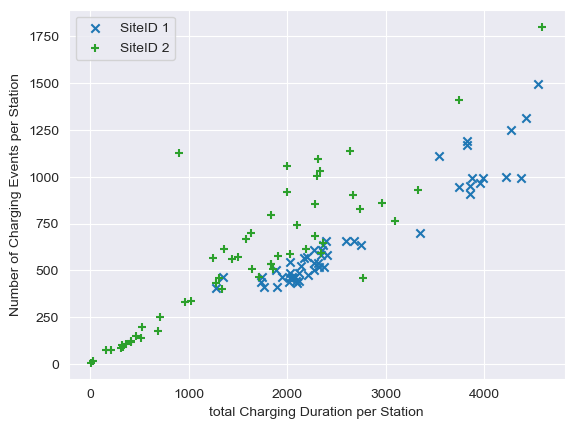

In [84]:

plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='1']["totalChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='1']["numChargingEvents"],marker='x', color='C0')
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='2']["totalChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='2']["numChargingEvents"], marker='+', color='C2')
plt.xlabel("total Charging Duration per Station")
plt.ylabel("Number of Charging Events per Station")
plt.legend(['SiteID 1', 'SiteID 2'])

plt.show()


#### additional fuctions 

In [86]:

#unique_types = charging_data['userID'].apply(type).unique()
#print("TYPE: ",unique_types)
#charging_data_test = charging_data[charging_data['connectionTime'].astype(str).str.startswith('2021')]


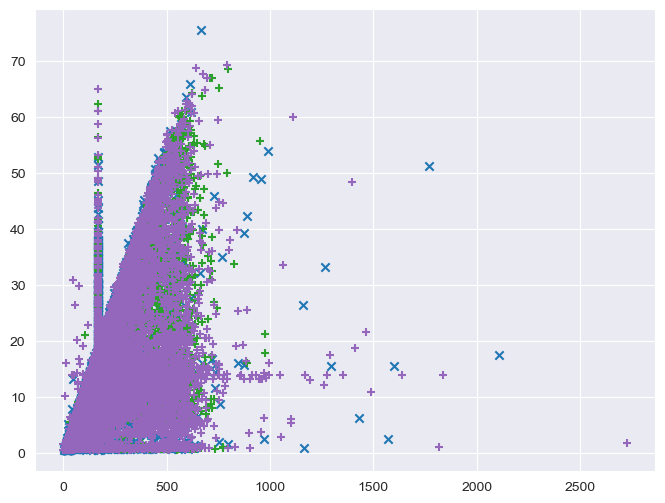

In [116]:
plt.figure(figsize = (8,6))
charging_data_summer.head()
plt.scatter(charging_data_winter[charging_data_winter["siteID"]=='2']["charging_duration"], 
           charging_data_winter[charging_data_winter["siteID"]=='2']["kWhDelivered"], marker='x', color='C0')
plt.scatter(charging_data_winter[charging_data_winter["siteID"]=='1']["charging_duration"], 
           charging_data_winter[charging_data_winter["siteID"]=='1']["kWhDelivered"], marker='+', color='C2')
plt.scatter(charging_data_autumn["charging_duration"], 
           charging_data_autumn["kWhDelivered"], marker='+', color='C4')
#plt.scatter(charging_data_spring["charging_duration"], 
 #           charging_data_spring["kWhDelivered"], marker='+', color='C5')
#plt.scatter(charging_data_summer["charging_duration"], 
#            charging_data_summer["kWhDelivered"], marker='x', color='C6')
plt.show()

ConversionError: Failed to convert value(s) to axis units: 0        1-1-178-817
1        1-1-178-817
2        1-1-178-817
3        1-1-178-817
4        1-1-178-817
            ...     
45891    2-39-95-444
45892    2-39-95-444
45893    2-39-95-444
45894    2-39-95-444
45895    2-39-95-444
Name: stationID, Length: 45896, dtype: object

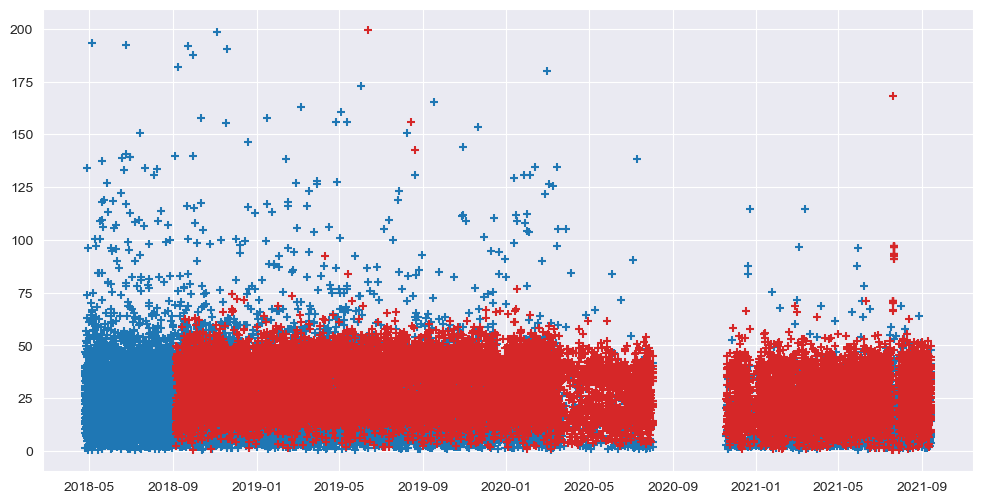

In [117]:
charging_data['chargingDuration_Hour'] = (charging_data['disconnectTime'] - charging_data['connectionTime']).dt.total_seconds() / 60 / 60
# Ensure 'connection_hour' is datetime and extract date and hour
charging_data['connection_hour'] = pd.to_datetime(charging_data['connection_hour'], errors='coerce')
charging_data['date'] = charging_data['connectionTime'].dt.date
charging_data['hour'] = charging_data['connectionTime'].dt.hour  # Extract hour



# Total charging duration per station per day
station_daily_utilization = charging_data.groupby(['stationID', 'date']).agg({
    'chargingDuration_Hour': 'mean',
    'kWhDelivered': 'mean'#
}).reset_index()


# Total available time is 24 hours per station per day
station_daily_utilization['utilization'] = (station_daily_utilization['chargingDuration_Hour'] / 24) * 100
station_daily_utilization['kWhDelivered_perHour'] = (station_daily_utilization['kWhDelivered'] / 24) * 100

#print(station_daily_utilization.head(20))
# Merge with siteID
station_daily_utilization = station_daily_utilization.merge(
    charging_data[['stationID', 'siteID']].drop_duplicates(),
    on='stationID',
    how='left'
)

# Merge with spaceID
station_daily_utilization = station_daily_utilization.merge(
    charging_data[['stationID', 'spaceID']].drop_duplicates(),
    on='stationID',
    how='left'
)

plt.figure(figsize=(12, 6))

# Example: Daily utilization scatter plot
plt.scatter(
    station_daily_utilization[station_daily_utilization["siteID"]=='2']['date'], 
    station_daily_utilization[station_daily_utilization["siteID"]=='2']['utilization'], 
    color='C0', label='Daily Utilization Site 1', marker = "+"
)

plt.scatter(
    station_daily_utilization[station_daily_utilization["siteID"]=='1']['date'], 
    station_daily_utilization[station_daily_utilization["siteID"]=='1']['utilization'], 
    color='C3', label='Daily Utilization Site 2', marker="+"
)

plt.scatter(
    station_daily_utilization['stationID'], 
    station_daily_utilization['kWhDelivered_perHour'], 
    color='C2', label='kWhDelivered_per_Day'
)

plt.xlabel("Station ID")
plt.ylabel("Utilization (%)")
plt.title("Station Utilization per Day")
plt.axhline(y=100, color='r', linestyle='--', label='Max Utilization')
plt.legend()
plt.grid(True)
#plt.show()


In [118]:
plt.figure(figsize = (12,10))
# Ensure datetime columns are in datetime format

# Extract hour and day for grouping
charging_data['connection_hour'] = charging_data['connectionTime'].dt.hour
charging_data['connection_day'] = charging_data['connectionTime'].dt.day

charging_data['disconnection_hour'] = charging_data['disconnectTime'].dt.hour
charging_data['disconnection_day'] = charging_data['disconnectTime'].dt.day

charging_data['weekday'] =  charging_data['connectionTime'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<Figure size 1200x1000 with 0 Axes>

In [119]:
def split_session(row):
    session_start = row['connectionTime']
    session_end = row['doneChargingTime']
    total_duration = (session_end - session_start).total_seconds() / 3600  # Duration in hours

    # Generate hourly intervals
    hourly_data = []
    current_time = session_start

    while current_time < session_end:
        hour_end = min(current_time.replace(minute=0, second=0, microsecond=0) + pd.Timedelta(hours=1), session_end)
        hour_duration = (hour_end - current_time).total_seconds() / 3600

        # Proportion of kWhDelivered for this hour
        hourly_kWh = (hour_duration / total_duration) * row['kWhDelivered']
        hourly_data.append({
            'date': current_time.date(),
            'hour': current_time.hour,
            'stationID': row['stationID'],
            'kWhDelivered': hourly_kWh
        })

        current_time = hour_end

    return hourly_data

# Apply the function and explode the data
split_data = charging_data.apply(split_session, axis=1)
split_data = pd.DataFrame([item for sublist in split_data for item in sublist])


#plot for one specific date




# Filter for a specific date (e.g., '2023-12-26')



def calculateSpecificDate(date):
    daily_data = split_data[split_data['date'] == pd.to_datetime(date).date()]

    # Aggregate by hour    
    hourly_kWhDelivered = daily_data.groupby(daily_data['hour'])['kWhDelivered'].sum().reset_index()
    hourly_kWhDelivered.columns = ['hour', 'kWhDelivered']  

    return hourly_kWhDelivered






    

In [107]:
def calculateStationUtilization(date):
    daily_data = split_data[split_data['date'] == pd.to_datetime(date).date()]

    # Aggregate by hour    
    hourly_kWhDelivered = daily_data.groupby(daily_data['hour'])['stationID'].count().reset_index()
    hourly_kWhDelivered.columns = ['hour', 'numberOfStations']  

    return hourly_kWhDelivered

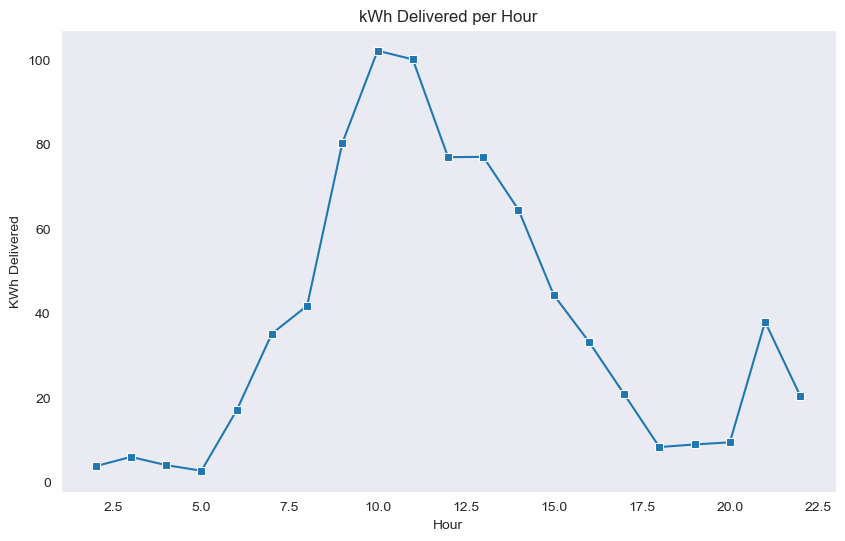

In [114]:
specific_date2 = '2018-04-25'
specific_date1 = '2021-07-29'

date1 = calculateSpecificDate(specific_date1)
date2 = calculateSpecificDate(specific_date2)

StationTest = calculateStationUtilization(specific_date1)



plt.figure(figsize=(10, 6))
#sns.lineplot(data=StationTest, x='hour', y='numberOfStations')
sns.lineplot(data=date1, x='hour', y='kWhDelivered', marker='s')
plt.title('kWh Delivered per Hour')
plt.xlabel('Hour')
plt.ylabel('KWh Delivered')
plt.grid()
plt.show()

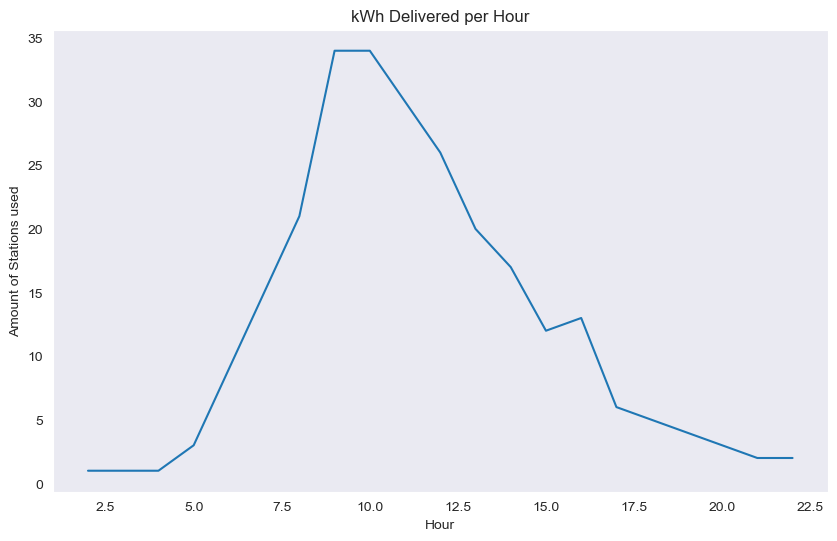

In [115]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=StationTest, x='hour', y='numberOfStations')
#sns.lineplot(data=date2, x='hour', y='kWhDelivered', marker='s')
plt.title('kWh Delivered per Hour')
plt.xlabel('Hour')
plt.ylabel('Amount of Stations used')
plt.grid()
plt.show()

In [69]:
print(split_data.head(100))
#print(split_data.info())

          date  hour    stationID  kWhDelivered
0   2020-01-02     5  1-1-179-810      4.866383
1   2020-01-02     6  1-1-179-810      5.713952
2   2020-01-02     7  1-1-179-810      5.713952
3   2020-01-02     8  1-1-179-810      5.713952
4   2020-01-02     9  1-1-179-810      3.007761
..         ...   ...          ...           ...
95  2020-01-02     9  1-1-193-816      2.355022
96  2020-01-02    10  1-1-193-816      2.355022
97  2020-01-02    11  1-1-193-816      0.584831
98  2020-01-02     7  1-1-179-798      1.744754
99  2020-01-02     8  1-1-179-798      2.784183

[100 rows x 4 columns]
